In [31]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat



In [32]:
df = pd.read_csv('adult.csv')
df.head(2)  

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [33]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [35]:
def null_percent(df) : 
    percent_missing = df.isnull().sum() * 100 / len(df) 
    missing_value_df = pd.DataFrame({ 
                                    'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True , ascending=False)
    return missing_value_df   
missing_df = null_percent(df)
missing_df

,percent_missing
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
education-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
sex,0.0


In [36]:
# function declaration for future purposes 
def categ_bar_pourcent(df_,x_,y_,aspect_ , Order = None ) : 
    x,y = x_, y_

    df1 = df_.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()
    df1 = df1.sort_values(['percent', y], ascending=[False, True])

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1 ,aspect=aspect_ , order=Order)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height() +0.7 
        g.ax.text(txt_x,txt_y,txt ,ha='center' , va='bottom' ) 

def value_counts_percentage( data , feature) : 
    value_counts = data[feature].value_counts(normalize=True) 
    percentage = value_counts * 100 

    # Create a new dataframe with the value counts and percentage
    df_summary = pd.concat([percentage], axis=1 )
    df_summary.columns = ['percentage']

    print(df_summary)

def categ_line_pourcent(df_, x_, y_, Order=None):
    x, y = x_, y_

    # Calculate the percentages of each combination of values
    df1 = df_.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()

    # Create the line chart
    sns.lineplot(x=x, y='percent', hue=y, data=df1, markers=True, sort=Order)

    # Add labels and legend
    plt.xlabel(x) 
    plt.ylabel('Percentage')
    plt.title('Percentage of {} by {}'.format(y, x))
    plt.legend()

    # Show the chart
    plt.show()


def value_count_percent(df , feature ) : 
    ax = sns.countplot(x=feature, data=df , palette='viridis',saturation=0.9,edgecolor="black" , order=df[feature].value_counts().index)
    total = float(len(df))
    for p in ax.patches:   
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 150, '{:.1f}%'.format((height/total)*100), ha="center")

    plt.show()


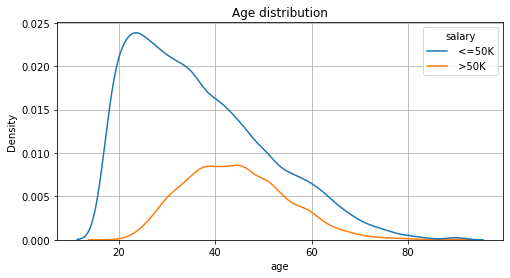

In [37]:
plt.figure(figsize=(8,4))
sns.kdeplot(x=df['age'],hue=df['salary'])
plt.grid(True) 
plt.title('Age distribution')  
plt.show()

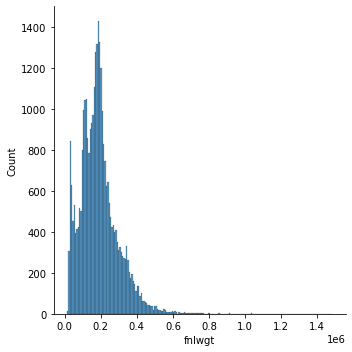

In [38]:
sns.displot(df.fnlwgt)  

In [39]:
df.drop(columns=['fnlwgt'],inplace=True)

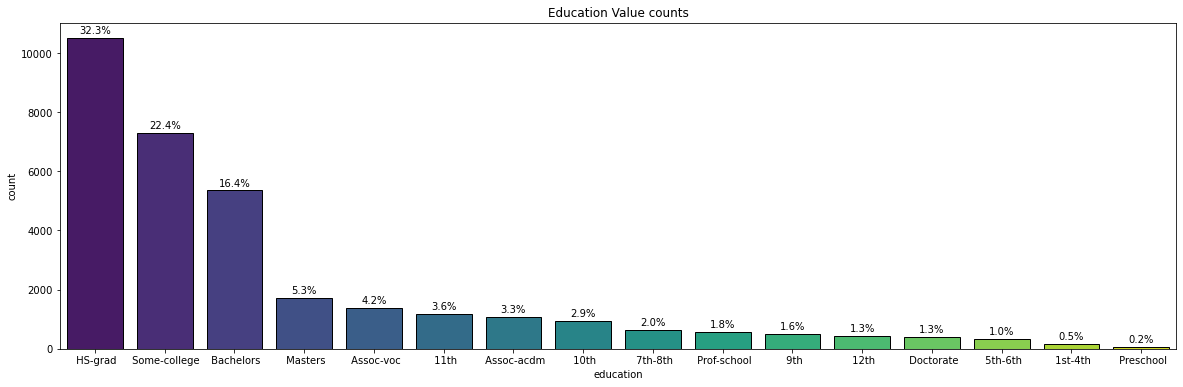

In [40]:
plt.figure(figsize=(20,6)) 
plt.title('Education Value counts')

value_count_percent(df , "education" ) 

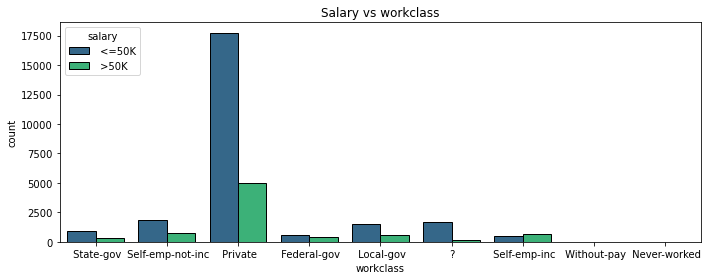

In [41]:
plt.figure(figsize=(10,4)) 
sns.countplot(x=df['workclass'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black") 
plt.title('Salary vs workclass') 
plt.tight_layout()
plt.show()         

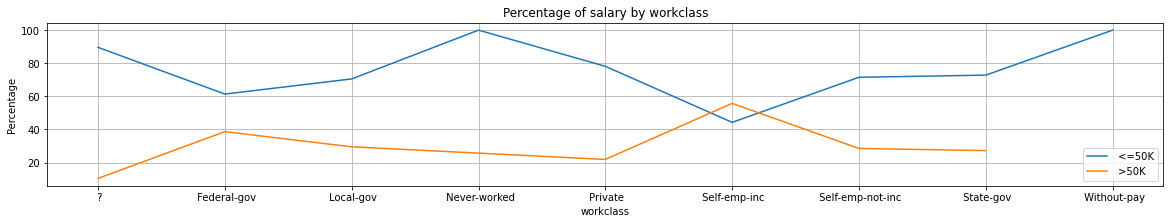

In [42]:
plt.figure(figsize=(20,3))  
plt.grid(True) 

categ_line_pourcent(df,'workclass','salary' ) 
    

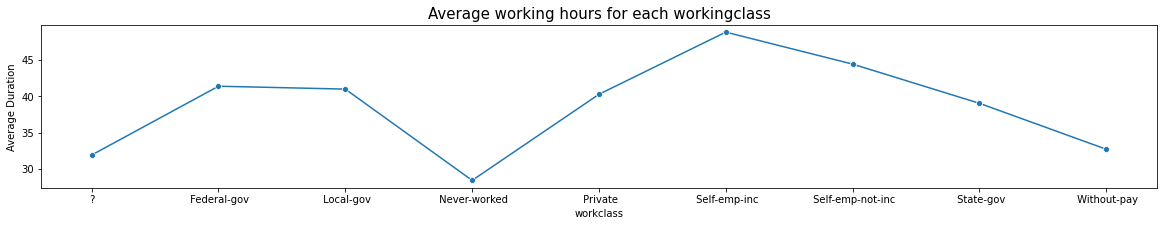

In [43]:
df_avg = df.groupby(['workclass'])['hours-per-week'].mean()
df_avg = df_avg.reset_index()         
# plot a line plot with colors based on user_type 
plt.figure(figsize=[20,3])
sns.lineplot(data = df_avg, x='workclass', y='hours-per-week', marker='o')
plt.title("Average working hours for each workingclass",fontsize = 15)
plt.ylabel('Average Duration'); 

posx and posy should be finite values
posx and posy should be finite values


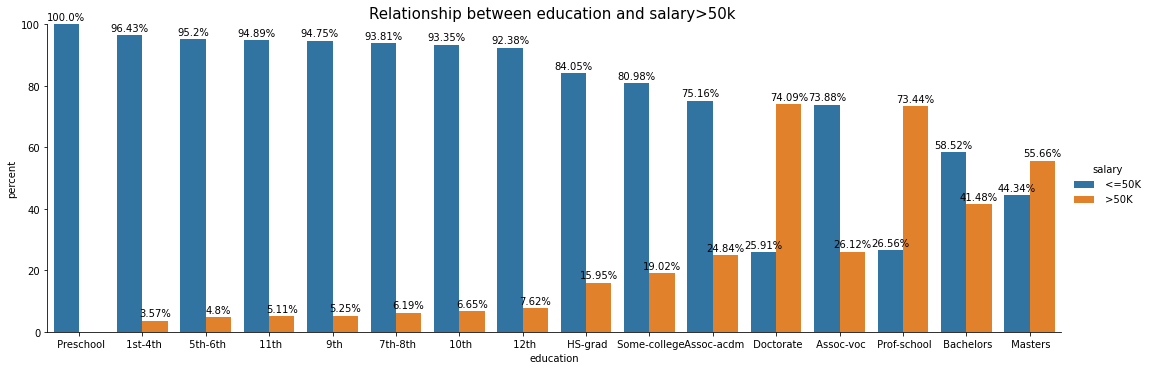

In [44]:
# order we will use for the future 
categ_bar_pourcent(df,'education','salary',3 ) 
plt.title("Relationship between education and salary>50k " , fontsize=15);  

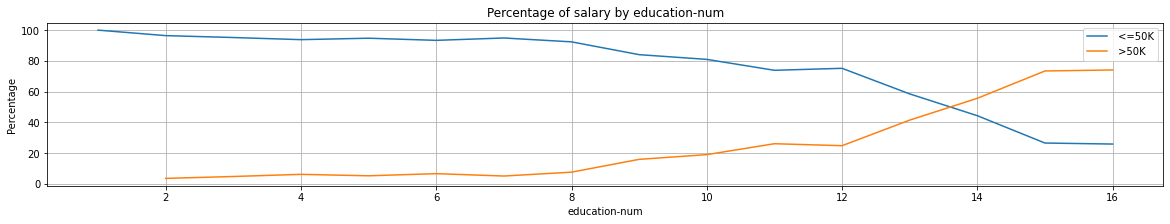

In [45]:
plt.figure(figsize=(20,3)) 
plt.grid(True)  
categ_line_pourcent(df,'education-num','salary' ) 


In [46]:
def married(val):
    if val==' Never-married':
        return 'not-married'
    elif val==' Divorced':
        return 'not-married'
    elif val==' Separated':
        return 'not-married'
    elif val==' Widowed':
        return 'not-married'
    else:
        return 'married'
df['marital-status']=df['marital-status'].apply(married)


Text(0.5, 1.0, 'Salary vs Marital status')

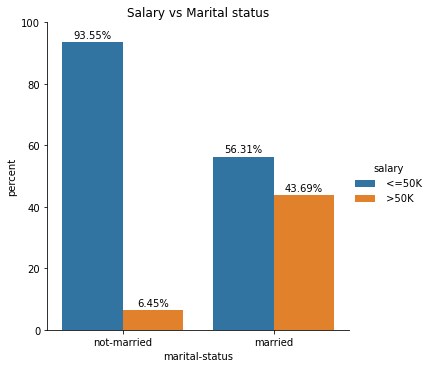

In [47]:
categ_bar_pourcent(df,'marital-status','salary',1 ) 
plt.title('Salary vs Marital status')


Text(0.5, 1.0, 'Salary vs Occupation ')

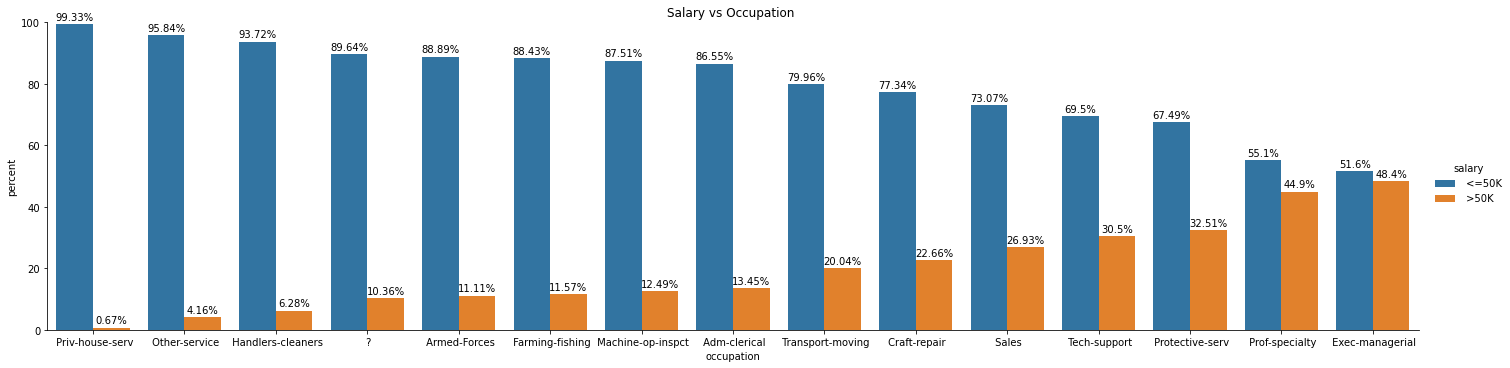

In [48]:
categ_bar_pourcent(df,'occupation','salary',4 ) 
plt.title('Salary vs Occupation ')



<AxesSubplot:title={'center':'Distribution of capital gain , loss '}, xlabel='capital-loss', ylabel='Density'>

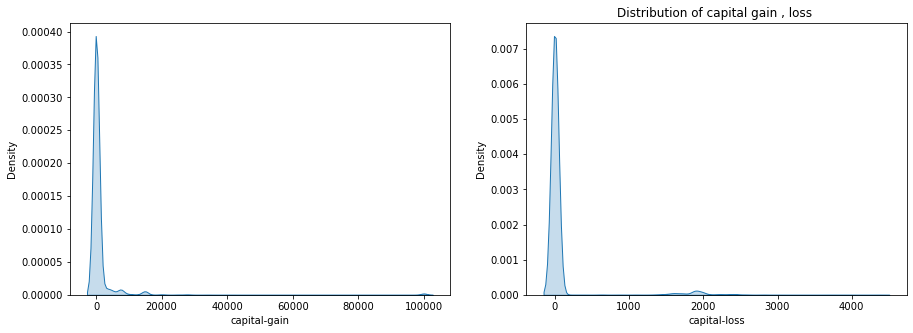

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# create figure and axis objects
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
plt.title('Distribution of capital gain , loss ')

# plot distribution of total bill and tip next to each other
sns.kdeplot(data=df, x="capital-gain", multiple="layer", ax=axs[0] , fill=True)
sns.kdeplot(data=df, x="capital-loss", multiple="layer" ,ax=axs[1] , fill=True)


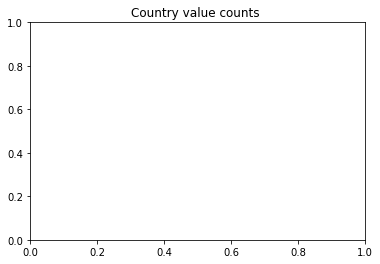

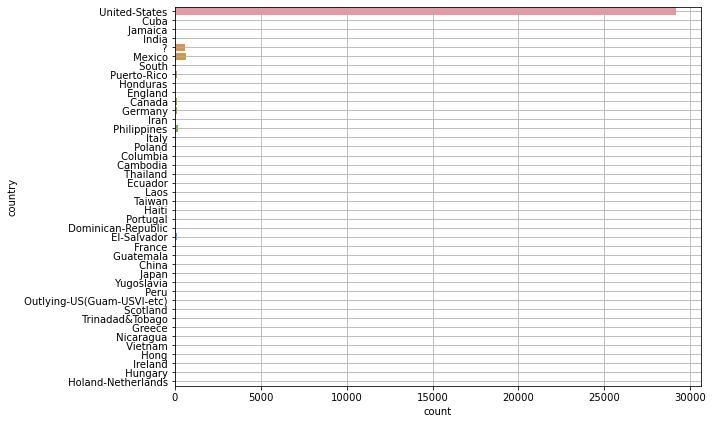

In [50]:
plt.title('Country value counts ')

plt.figure(figsize=(10,6)) 
sns.countplot(y=df['country'])
plt.tight_layout()
plt.grid(True)    
plt.show() 

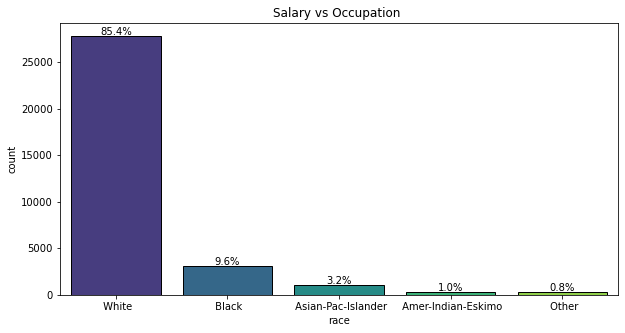

In [51]:
plt.figure(figsize=(10,5)) 
plt.title('Salary vs Occupation ')

value_count_percent(df , "race" ) 
#df['race'].value_counts().plot(kind='bar')    

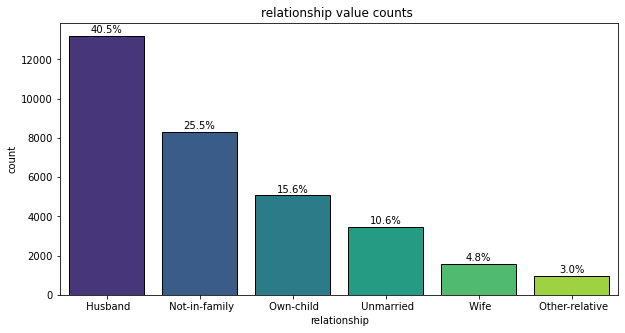

In [52]:
plt.figure(figsize=(10,5)) 
plt.title('relationship value counts ')

value_count_percent(df , "relationship" ) 
#df['race'].value_counts().plot(kind='bar')    

In [53]:
df.drop(columns=['education-num' , 'race' , 'country'],inplace=True)

In [54]:
df[df == ' ?'] = np.nan 

In [55]:
missing_df = null_percent(df)
missing_df 

,percent_missing
occupation,5.660146
workclass,5.638647
age,0.000000
education,0.000000
marital-status,0.000000
relationship,0.000000
sex,0.000000
capital-gain,0.000000
capital-loss,0.000000
hours-per-week,0.000000


In [56]:
df.dropna(inplace=True)  

In [57]:
from sklearn import preprocessing
import pandas as pd

le = preprocessing.LabelEncoder()
df['salary'] = le.fit_transform(df.salary.values)

<AxesSubplot:>

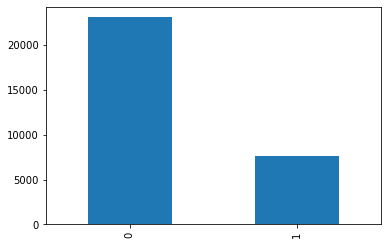

In [58]:
df['salary'].value_counts().plot(kind='bar')

In [59]:
df_train = pd.get_dummies(df)

In [64]:
from imblearn.over_sampling import RandomOverSampler

X = df_train.drop(columns=['salary'])
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, df.salary) 
X_resampled.shape

(46136, 51)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = np.array( X_resampled)
Y = np.array(y_resampled)
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y) 

X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=0.2)


models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100, max_features=3)))

columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']
results = pd.DataFrame(columns=columns)

# Evaluate each model and store its classification metrics in the results DataFrame
for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_validation)
    accuracy = accuracy_score(Y_validation, y_pred)
    precision = precision_score(Y_validation, y_pred, average='weighted')
    recall = recall_score(Y_validation, y_pred, average='weighted')
    f1 = f1_score(Y_validation, y_pred, average='weighted')
    results = results.append(pd.DataFrame([[name, accuracy, precision, recall, f1]], columns=columns), ignore_index=True)

# Print the results
results

Split Data: X
[[  39 2174    0 ...    0    0    1]
 [  50    0    0 ...    0    0    1]
 [  38    0    0 ...    0    0    1]
 ...
 [  40    0    0 ...    0    0    1]
 [  28    0    0 ...    0    1    0]
 [  35    0    0 ...    0    0    1]]
Split Data: Y
[0 0 0 ... 1 1 1]


c:\Users\ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ahmed\AppData\Local\Temp\ipykernel_20692\2194975564.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([[name, accuracy, precision, recall, f1]], columns=columns), ignore_index=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_20692\2194975564.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

,Model,Accuracy,Precision,Recall,F1-score
0,LR,0.785869,0.78623,0.785869,0.785807
1,KNN,0.838643,0.845675,0.838643,0.837834
2,CART,0.892176,0.896352,0.892176,0.891898
3,RF,0.909189,0.913128,0.909189,0.908978
